# Введение в DS на УБ и МиРА (2022)

## Домашнее задание #4: Линейная регрессия

### Дедлайн: 10 июня 2022 года, 23:59

**Правила игры**

1. Домашнее задание состоит из трёх частей, которые оцениваются в 2 -- 4 -- 4 балла. Все пункты в пределах одной части имеют одинаковый вес.

2. Решения принимаются до **10 июня 2022 года, 23:59 МСК** включительно. Работы, отправленные после дедлайна, **не проверяются**. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

3. Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/vX7_k1kZ).

4. Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

5. Плагиат не допускается. При обнаружении случаев списывания, $0$ за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 

Для проверки гипотез используйте ваш любимый уровень значимости! 

---

В этом задании нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. В качестве зависимой переменной возьмём температуру воздуха в градусах Цельсия (`Temperature (C)`).

Наша цель состоит в том, чтобы построить две линейные регрессионные модели: объясняющую и предиктивную. Объясняющая модель должна быть пригодна для статистической интерпретации зависимостей, то есть показывать, какие факторы влияют на температуру воздуха, каким образом и какое возможное объяснение этого влияния можно привести. Предиктивная модель может быть совершенно ужасной с точки зрения статистики (например, все коэффициенты могут быть не значимы), но она должна давать хорошие прогнозы в соответствии с некоторой метрикой.

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные (то есть как независимые наблюдения в пространстве).

### Часть 1: Предобработка данных (2 балла)

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.** Загрузите данные из файла `weatherHistory.csv`. Выведите первые 5 строк таблицы.

In [67]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Задание 2.** Изучите статью о том, что такое [apparent temperature](https://www.kxan.com/weather/difference-between-temperature-and-feels-like-temperature/) (также называемая "feels-like temperature" и "heat index"). Удалите какую-то переменную из набора данных и поясните, почему вы её удалили (помните о том, какая переменная будет целевой). Также удалите переменные:
- `Formatted Date` (потому что договорились, что не обращаем внимания на даты).
- `Daily Summary` (будем использовать просто `Summary`). 

In [68]:
print(df['Loud Cover'].value_counts())
# Эта переменная просто нули, она вообще не нужна
df = df.drop(['Loud Cover', 'Formatted Date', 'Daily Summary'], axis = 1)

0.0    96453
Name: Loud Cover, dtype: int64


**Задание 3.** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [69]:
df.info()
# Пропущено пару значений в фиче Precip Type
df = df.drop(df.loc[df['Precip Type'].isnull()].index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.6+ MB


**Задание 4.** В данных есть одна числовая переменная, которая не несёт информации для предсказания целевой переменной. Найдите эту переменную, поясните ваш выбор и удалите её. 

In [70]:
# Не уверен, что направление ветра имеет какое то практическое влияние на температуру
df = df.drop('Wind Bearing (degrees)' , axis = 1)

**Задание 5.** Постройте диаграммы рассеяния всех числовых переменных против целевой (для этого используйте какой-то метод из `seaborn`). Есть ли переменные, для которых наблюдается очевидная нелинейная зависимость?

**Подсказка:** это пригодится для частей 2 и 3.

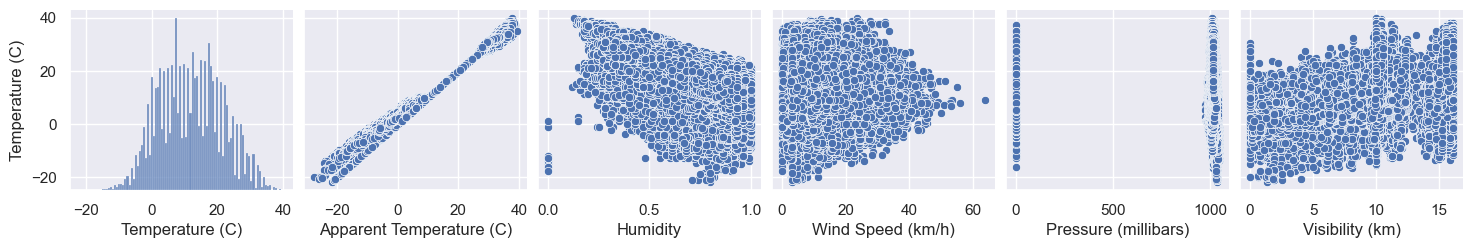

In [71]:
sns.set()
cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Visibility (km)']
sns.pairplot(data = df[cols], y_vars=['Temperature (C)'], height = 2.5)
plt.show()
# Возможно тут есть обратная зависимость между влажностью и температурой

**Задание 6.** Преобразуйте категориальные переменные при помощи One Hot Encoding (то есть переведите их в дамми-переменные).

In [72]:
df = pd.get_dummies(df)

**Задание 7.** Выведите корреляционную матрицу переменных. Какие переменные лучше всего коррелируют с целевой (назовите три)? 

**Подсказка:** это пригодится для частей 2 и 3.

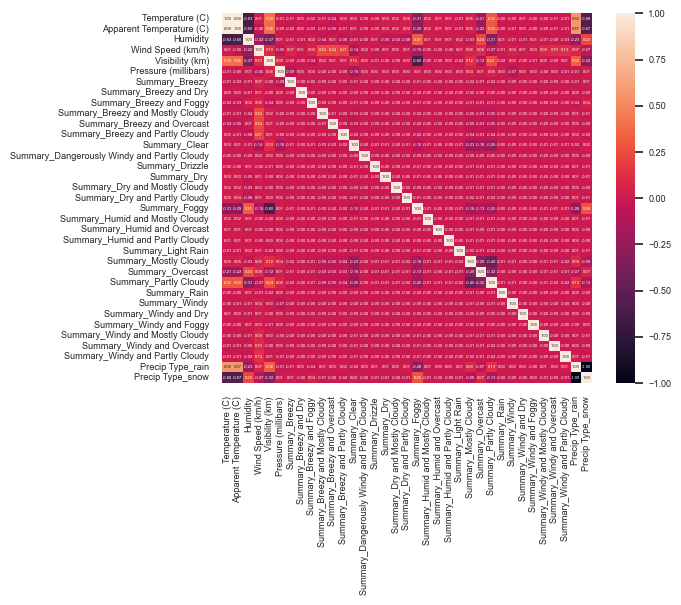

In [73]:
cols = df.columns
cm = np.corrcoef(df.values.T)
sns.set(font_scale=0.6)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 3}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
# Можно увидеть что самая большая корреляция с целевой переменной у Apparent temperature, Humidity, Precip Type_snow

**Задание 8.** Разделите данные на регрессоры (`X`) и целевую переменную (`y`). Если всё сделано правильно, то `X` и `y` должны иметь размеры, указанные ниже.

In [74]:
X = df[df.columns[1:]]
y = df['Temperature (C)']

In [75]:
print('X:', X.shape)
print('y:', y.shape)

X: (95936, 34)
y: (95936,)


**Задание 8.** Похоже ли распределение целевой переменной на нормальное? Поясните, почему важно, чтобы распределение `y` было похоже на нормальное.

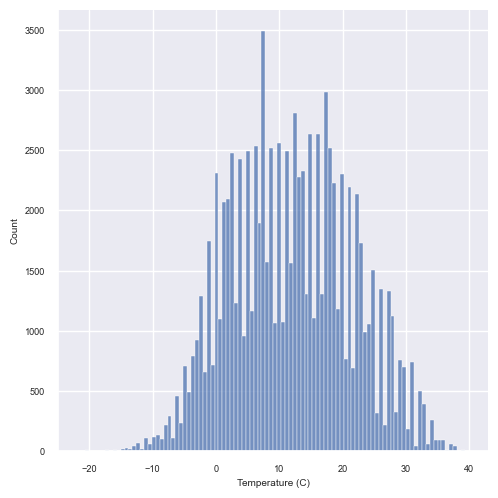

In [76]:
sns.displot(df['Temperature (C)'])
# Распределение целевой переменной явно похоже на нормальное
# Нормальное распределение гарантирует то что распределение остатков тоже нормальное,
# что гарантирует корректность и эффективность линейной регрессии

### Часть 2: Построение объясняющей модели (4 балла)

**Задание 9.** На основании предыдущего анализа и логических соображений выберите шесть регрессоров (не считая константный), которые будут включены в объясняющую модель. Помните, что когда мы строим объясняющую модель, выбор переменных должнен быть обоснован (не достаточно использовать предыдущий анализ, выбор каждой переменной должен иметь теоретическое или логическое обоснование). В качестве регрессоров можно брать переменные из `X` или преобразования над ними (`Humidity` и `Humidity`$^2$ будем считать разными регрессорами). 

Создайте ячейку Markdown ниже и запишите в неё функциональный вид модели, которую вы будете оценивать. Поясните выбор регрессоров (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации) и, если используете, выбор нелинейных преобразований над ними.

Я строю модель

$$
y_i = \beta_0 + \beta_1 Apparent Temperature (C) + \beta_2 Humidity - \beta_3 Visibility (km)^2 + \beta_4 snow + \beta_5 rain + \beta_6 partly cloudy + \varepsilon_i
$$

Обоснование выбора переменных:
- $Humidity$ – потому что, судя по статье сверху, влажность имеет связь с температурой
- $Apparent Temperature$ – та же причина
- $Visibility^2$ - видимость это знак как очень большой, так и очень малой температуре
- $Precip\_type\_snow$ - больше снега - меньше тепла
- $Precip\_type\_rain$ - вода после дождя дает более эффективный теплообмен с землей
- $Summary\_partly\_Cloudy$ - чем больше облаков, тем меньше солнечного света добирается до земли 

**Задание 10.** Выделите выбранные признаки в переменную `X1`. 

In [77]:
df['visibility_sq'] = -df['Visibility (km)']**2
cols = ['Apparent Temperature (C)', 'Humidity', 'visibility_sq', 'Precip Type_rain', 'Precip Type_snow', 'Summary_Partly Cloudy']
X1 = df[cols]

**Задание 11.** Оцените модель при помощи МНК (минимзации MSE). Прокомментируйте значимость коэффициентов.

In [78]:
from sklearn.linear_model import LinearRegression # подгрузили модель
from sklearn.metrics import mean_squared_error as mse
model = LinearRegression()
model.fit(X1, y)
y_pred = model.predict(X1)
mse(y, y_pred)

1.1671822460103527

**Задание 12.** Поясните, как каждый регрессор влияет на зависимую переменную 
1. математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и 
2. содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что...").

In [79]:
for co, fe in zip(model.coef_, cols):
    print(fe, round(co, 2))

Apparent Temperature (C) 0.85
Humidity -2.72
visibility_sq -0.0
Precip Type_rain 0.16
Precip Type_snow -0.16
Summary_Partly Cloudy -0.05


При увеличении температуры по ощущению на 1 градус, фактическая температура увеличится на 0.85\
При увеличении видимости на 1 километр фактическая температура не изменится\
При увеличении влажности на 100%, температура уменьшится на 2.72\
После дождя температура увеличиватся на 0.16, После снега температура уменьшается на 0.16\
Облачность забирает 0.05 градуса у столбика термометра

Температура по ощущению имеет очень сильную прямую зависимость с реальной температурой, зачастую они почти одинаковы\
Влажность забирает тепло из воздуха\
Видимость работает как для жаркой погоды, так и для холодной, видимо равно в обе стороны\
Дождь увеличивает температуру так как вода улучшает теплообмен с почвой и воздухом\
Снег забирает тепло\
Облака мешают солнечным лучам добраться до земли

**Задание 13.** Рассчитайте $R^2$ и MSE на выборке `X1`. Прокомментируйте качество подгонки регрессии.

In [80]:
from sklearn.metrics import r2_score
print(r2_score(y, y_pred))
print(mse(y, y_pred))

0.9872573880474897
1.1671822460103527


### Часть 3: Построение предсказательной модели (4 балла)

В предыдущей части мы хотели объяснить $y$ при помощи каких-то регрессоров, которые мы отбирали из теоретико-логических соображений. Теперь поставим другую задачу: мы не хотим ничего объяснять, а хотим только хорошо предсказывать $y$ по новым наблюдениям. Код ниже поделит выборку (`X`, `y`) на обучающую (`X_train`, `y_train`), на которой будем *оценивать* модель, и *тестовую* (`X_test`, `y_test`), на которой будем предсказывать. 

In [81]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задание 14.** Сохраните в переменные `X_train_1` и `X_test_1` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9).

Оцените модель на выборке `X_train_1`. Сделайте предсказания на выборках `X_train_1` (то есть обучающей) и `X_test_1` (то есть тестовой). Рассчитайте `MAE` на этих выборках.

In [82]:
from sklearn.metrics import mean_absolute_error as mae
X_train_1, X_test_1, y_train, y_test = train_test_split(X1, y, test_size = 0.3)
model = LinearRegression()
model.fit(X_train_1, y_train)
y_pred_train = model.predict(X_train_1)
y_pred_test = model.predict(X_test_1)
print(mae(y_train, y_pred_train))
print(mae(y_test, y_pred_test))

0.8257209107834925
0.8282885346198504


**Задание 15.** Теперь сохраните в переменные `X_train_2` и `X_test_2` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9) и ещё какие-то признаки (количество выберите на ваш вкус, главное, чтобы всего признаков было больше, чем в `X1`). Оцените модель на выборке `X_train_2`. Сделайте предсказания на выборках `X_train_2` (то есть обучающей) и `X_test_2` (то есть тестовой). Рассчитайте `MAE` на этих выборках. Удалось ли повысить качество на обучающей выборке? А на тестовой? Поясните. 

In [83]:
# Добавим давление и скорость ветра в нашу модель
cols = cols + ['Wind Speed (km/h)', 'Pressure (millibars)']
X2 = df[cols]
X_train_2, X_test_2, y_train, y_test = train_test_split(X2, y, test_size = 0.3)
model = LinearRegression()
model.fit(X_train_2, y_train)
y_pred_train = model.predict(X_train_2)
y_pred_test = model.predict(X_test_2)
print(mae(y_train, y_pred_train))
print(mae(y_test, y_pred_test))

0.7418524037089222
0.7431972964672665


**Задание 16.** Прокомментируйте значимость коэффициентов модели, оценённой на `X_train_2`.

In [84]:
for co, fe in zip(model.coef_, cols):
    print(fe, round(co, 2))

Apparent Temperature (C) 0.87
Humidity -1.41
visibility_sq -0.0
Precip Type_rain -0.02
Precip Type_snow 0.02
Summary_Partly Cloudy 0.09
Wind Speed (km/h) 0.08
Pressure (millibars) -0.0


Влияние температуры на ощуп чуть увеличилось, эффект примерно такой же\
Роль влажности упало вдвое\
Видимость и давление не влияют на температуру\
Роль дождя со снегом сильно уменьшилась?\
Облачная погода теперь прибавляет к температуре?\
Скорость ветра делает теплее?

**Задание 17.** Будем называть модель, оценённую на `X_train_1`, **объясняющей**, а на `X_train_2` – **предсказательной**. На основании заданий 14 и 15 сделайте вывод, подходит ли объясняющая модель для предсказаний. На основании задания 16 сделайте вывод, подходит ли предсказательная модель для объяснительной интерпретации. 

Обе модели имеют довольно низкую среднюю абсолютную ошибку относительно градусной величины температуры, поэтому объясняющая модель вполне подходит для предсказаний (Хотя, очевидно, использование предсказательной модели даст результат лучше). Коэффициенты для объясняющей модели были довольно логичны и выглядили правильно, а коэффициенты в предсказательной модели начали давать странный результат (например присутствие облаков которые делают погоду теплее). Поэтому, я бы не сказал что целесообразно использовать предсказательную модель для объяснительной интерпретации

## Safe Area

Если хотите, напишите здесь что угодно. Можно вставить картинку.